# Error propagation

Use Monte Carlo method to propagate error.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo

## Read in data

Changed the excel file to make it easier to read in.

In [5]:
fname = '2020-0907-Error Propagation More Conservative'
df = pd.read_csv(fname + '.csv', skiprows=[1,2,4,9,13,17])
df

,Unnamed: 0,Unnamed: 1,Ms,Ms-Error,Ms0,Ms0-Error,Ms1,Ms2,deltas,deltas-Error,...,Mc2,deltac,deltac-Error,deltac0,deltac0-Error,delta1.1,delta1-Error.1,delta2.1,delta2-Error.1,Unnamed: 30
0,18,2000,0.26,0.01,0.26,0.05,0.00,0.00,0.31,0.05,...,0.00,0.21,0.07,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
1,20,2250,0.50,0.02,0.26,0.05,0.17,0.07,0.27,0.04,...,0.22,0.13,0.04,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
2,21,2300,0.37,0.02,0.26,0.05,0.06,0.06,0.40,0.05,...,0.25,0.35,0.05,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
3,23,2300,0.39,0.02,0.26,0.05,0.05,0.08,0.47,0.05,...,0.20,0.58,0.05,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
4,26,2300,0.37,0.02,0.26,0.05,0.04,0.08,0.49,0.04,...,0.24,0.55,0.04,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
5,18,2450,2.02,0.10,0.26,0.05,1.12,0.65,0.33,0.03,...,-0.13,-0.44,0.03,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
6,18,2500,2.94,0.15,0.26,0.05,1.67,1.01,0.35,0.02,...,-0.03,-0.31,0.02,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
7,20,2450,1.24,0.06,0.26,0.05,0.59,0.40,0.38,0.02,...,-0.34,-0.37,0.03,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
8,21,2450,0.62,0.03,0.26,0.05,0.12,0.16,0.66,0.03,...,0.33,0.29,0.04,0.21,0.14,-0.34,0.2,1.5,0.2,NaN
9,23,2450,0.38,0.02,0.26,0.05,0.00,0.12,0.68,0.03,...,0.17,0.40,0.06,0.21,0.14,-0.34,0.2,1.5,0.2,NaN


## Monte Carlo

The idea is:
Instead of solving equations with one input value per variable (for each observation), solve with a distribution of values for each variable. This way, we get both the mean and standard deviation at once.

We assign a Gaussian distribution to each input variable, where the Gaussian is defined by the expected value as the mean and the error as the standard deviation. All equations are solved for in a similar way to previously, but this time we solve each equation many times (controlled by variables `nsamples`). This way, we get a distribution of results for each of our 4 variables, over which to take the mean and standard deviation. These are then our value and our error.

In [6]:
# Set up
nsamples = 10000
nobserve = 12

# initialize all to 0
Ms1_mean, Ms1_std, Ms2_mean, Ms2_std, Mc1_mean, Mc1_std, Mc2_mean, Mc2_std  = np.zeros((8, nobserve))


In [7]:
for iobserve in range(nobserve):

    # Set up distributions for all variables, for this observation. Some will be re-defined even though 
    # they are constants because the code is simpler this way and it's fast anyway.
    key = 'Ms0'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    Ms0 = np.random.normal(mu, sigma, nsamples)

    key = 'Ms'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    Ms = np.random.normal(mu, sigma, nsamples)

    key = 'Mc0'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    Mc0 = np.random.normal(mu, sigma, nsamples)

    key = 'Mc'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    Mc = np.random.normal(mu, sigma, nsamples)

    key = 'deltas0'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    deltas0 = np.random.normal(mu, sigma, nsamples)

    key = 'deltas'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    deltas = np.random.normal(mu, sigma, nsamples)

    key = 'deltac0'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    deltac0 = np.random.normal(mu, sigma, nsamples)

    key = 'deltac'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    deltac = np.random.normal(mu, sigma, nsamples)

    key = 'delta1'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    delta1 = np.random.normal(mu, sigma, nsamples)

    key = 'delta2'
    mu, sigma = df[key].iloc[iobserve], df[key + '-Error'].iloc[iobserve]    # mean and standard deviation
    delta2 = np.random.normal(mu, sigma, nsamples)
    
    
    # Solve equations for this observation
    ddelta = delta2-delta1
    Ms2 = (Ms*deltas - Ms0*deltas0 + (Ms0-Ms)*delta1)/ddelta;
    Ms1 = Ms - Ms0 - Ms2
    Mc2 = (Mc*deltac - Mc0*deltac0 + (Mc0-Mc)*delta1)/ddelta;
    Mc1 = Mc - Mc0 - Mc2 

    # Calculate mean and standard deviation, store in arrays for later
    Ms2_mean[iobserve], Ms2_std[iobserve] = np.mean(Ms2), np.std(Ms2)
    Ms1_mean[iobserve], Ms1_std[iobserve] = np.mean(Ms1), np.std(Ms1)
    Mc2_mean[iobserve], Mc2_std[iobserve] = np.mean(Mc2), np.std(Mc2)
    Mc1_mean[iobserve], Mc1_std[iobserve] = np.mean(Mc1), np.std(Mc1)    


In [8]:
# Save results into dataframe
df['Ms2-mean'], df['Ms2-std'] = Ms2_mean, Ms2_std
df['Ms1-mean'], df['Ms1-std'] = Ms1_mean, Ms1_std
df['Mc2-mean'], df['Mc2-std'] = Mc2_mean, Mc2_std
df['Mc1-mean'], df['Mc1-std'] = Mc1_mean, Mc1_std
df

,Unnamed: 0,Unnamed: 1,Ms,Ms-Error,Ms0,Ms0-Error,Ms1,Ms2,deltas,deltas-Error,...,delta2-Error.1,Unnamed: 30,Ms2-mean,Ms2-std,Ms1-mean,Ms1-std,Mc2-mean,Mc2-std,Mc1-mean,Mc1-std
0,18,2000,0.26,0.01,0.26,0.05,0.00,0.00,0.31,0.05,...,0.2,NaN,-0.000152,0.024819,-0.000400,0.037380,0.000387,0.038601,0.000152,0.057799
1,20,2250,0.50,0.02,0.26,0.05,0.17,0.07,0.27,0.04,...,0.2,NaN,0.072994,0.033458,0.166161,0.045064,0.210242,0.098947,0.699747,0.122779
2,21,2300,0.37,0.02,0.26,0.05,0.06,0.06,0.40,0.05,...,0.2,NaN,0.056800,0.028376,0.053294,0.040049,0.352162,0.092204,0.519734,0.107490
3,23,2300,0.39,0.02,0.26,0.05,0.05,0.08,0.47,0.05,...,0.2,NaN,0.080835,0.029883,0.050072,0.040644,0.201506,0.051929,0.048600,0.065089
4,26,2300,0.37,0.02,0.26,0.05,0.04,0.08,0.49,0.04,...,0.2,NaN,0.075564,0.028400,0.033806,0.039113,0.239838,0.057269,0.109431,0.069358
5,18,2450,2.02,0.10,0.26,0.05,1.12,0.65,0.33,0.03,...,0.2,NaN,0.635404,0.157390,1.123944,0.168302,-0.402142,0.501800,4.242007,0.611651
6,18,2500,2.94,0.15,0.26,0.05,1.67,1.01,0.35,0.02,...,0.2,NaN,1.001868,0.231290,1.678787,0.244568,-0.080135,0.636687,5.517842,0.789402
7,20,2450,1.24,0.06,0.26,0.05,0.59,0.40,0.38,0.02,...,0.2,NaN,0.389495,0.088351,0.590401,0.097091,-0.152879,0.147686,1.201558,0.214937
8,21,2450,0.62,0.03,0.26,0.05,0.12,0.16,0.66,0.03,...,0.2,NaN,0.246586,0.043205,0.114052,0.049999,0.327346,0.095357,0.592603,0.117963
9,23,2450,0.38,0.02,0.26,0.05,0.00,0.12,0.68,0.03,...,0.2,NaN,0.120363,0.030157,-0.000271,0.040186,0.172064,0.055356,0.158666,0.072753


In [9]:
# Export results
df.to_csv(fname + 'output.csv')

### Illustration

The figure below shows, as an example for illustration purposes, all of the inputs as distributions to the calculation for $M_{s2}$ for the final observation. The details aren't important in the picture, but it is to illustrate the change in approach here.


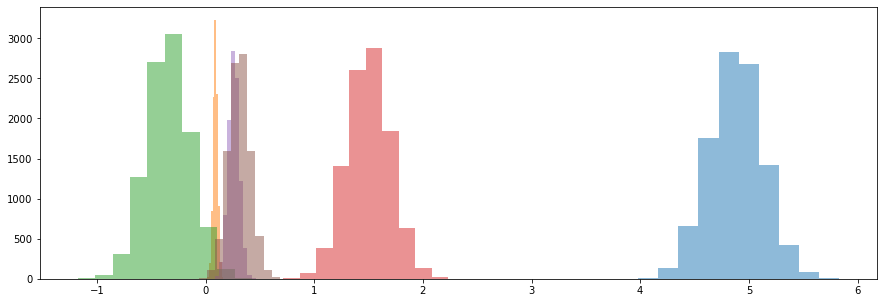

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.hist(Ms, alpha=0.5)
ax.hist(deltas, alpha=0.5)
ax.hist(delta1, alpha=0.5)
ax.hist(delta2, alpha=0.5)
ax.hist(Ms0, alpha=0.5)
ax.hist(deltas0, alpha=0.5);

## Compare with previous results

Just to feel good that things haven't changed.

<AxesSubplot:xlabel='Mc2', ylabel='Mc2-mean'>

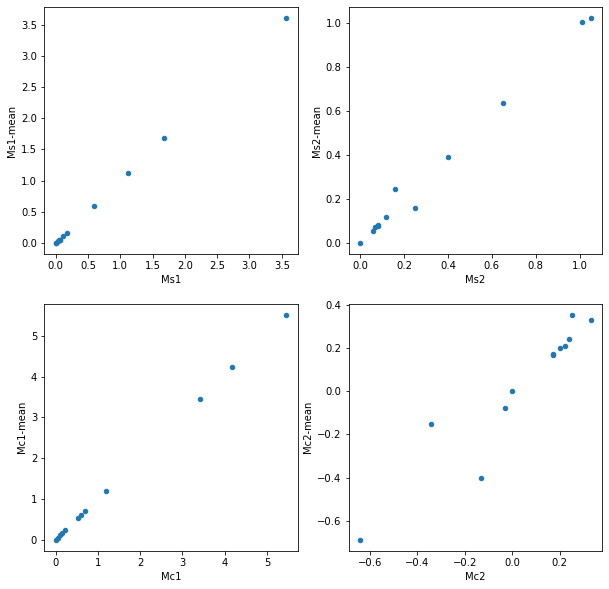

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
df.plot(x='Ms1', y='Ms1-mean', kind='scatter', ax=axes[0,0])
df.plot(x='Ms2', y='Ms2-mean', kind='scatter', ax=axes[0,1])
df.plot(x='Mc1', y='Mc1-mean', kind='scatter', ax=axes[1,0])
df.plot(x='Mc2', y='Mc2-mean', kind='scatter', ax=axes[1,1])


# Illustrate results

Show results with error bars.

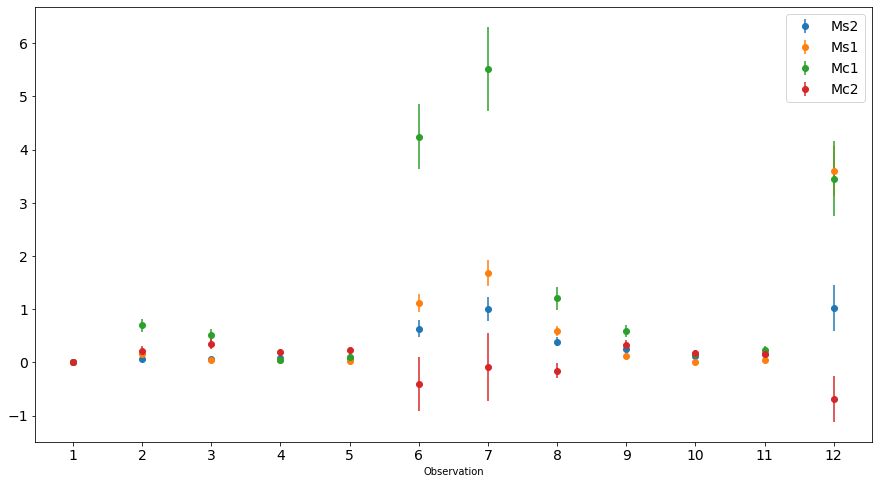

In [12]:
ax = df['Ms2-mean'].plot(yerr=df['Ms2-std'], ls=' ', marker='o', figsize=(15,8), label='Ms2')
df['Ms1-mean'].plot(yerr=df['Ms1-std'], ls=' ', marker='o', label='Ms1')
df['Mc1-mean'].plot(yerr=df['Mc1-std'], ls=' ', marker='o', label='Mc1')
df['Mc2-mean'].plot(yerr=df['Mc2-std'], ls=' ', marker='o', label='Mc2')
ax.axis('auto')
ticks = np.arange(0,12)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks+1);
ax.tick_params(labelsize=14)
ax.set_xlabel('Observation')
plt.legend(fontsize=14)